### DACON(데이콘) 데이콘 Basic 자동차 가격 예측 AI 경진대회

##### RandomForest 모델 학습

In [1]:
import pandas as pd

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

In [2]:
preprocess_X

,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0
1,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0
2,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0
3,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0
4,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,9,23,1957,15,64839,1461,0,1,0,0,0
57916,2006,2005,12,142,2941,16,299850,1796,0,0,1,0,0
57917,2013,2003,3,90,287,6,112000,1368,0,0,1,0,0
57918,2006,2004,12,19,3174,0,189321,1598,0,0,1,0,0


In [3]:
preprocess_Y

,Price
0,51.74
1,41.47
2,17.81
3,18.20
4,17.55
...,...
57915,116.87
57916,15.47
57917,21.97
57918,16.77


##### Train / Test 데이터 분할

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(preprocess_X,preprocess_Y,test_size=0.2,random_state=777)

In [5]:
X_train.shape , y_train.shape

((45359, 13), (45359, 1))

In [6]:
X_test.shape , y_test.shape

((11340, 13), (11340, 1))

##### 모델 학습

In [7]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=777)

rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

C:\Users\user\AppData\Local\Temp\ipykernel_16672\4211305117.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


##### 평가지표 : MAE, MSE, RMSE, MAPE

In [8]:
# 실제 정답 값과 예측 값의 차이를 절댓값으로 변환한 뒤 합산하여 평균을 구한다.
# 특이값이 많은 경우에 주로 사용된다.
# 값이 낮을수록 좋다.

#장점
#직관점임
#정답 및 예측 값과 같은 단위를 가짐

#단점
#실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
#스케일 의존적임(scal dependency): 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
mae

6.106829515348115

In [9]:
# MSE(Mean Squared Error) = 평균 제곱 오차
# 실제 정답 값과 예측 값의 차이를 제곱한 뒤 평균을 구한다.
# 값이 낮을수록 좋다.

# 장점
# 직관적임

# 단점
# 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
# 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
# 스케일 의존적임(scal dependency): 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test,y_pred)
mse

87.97187399251244

In [10]:
# RMSE(Root Mean Squared Error) = 평균 제곱근 오차
# MSE에 루트는 씌워서 에러를 제곱해서 생기는 값의 왜곡이 줄어든다.

# 값이 낮을수록 좋다.

# 장점
# 직관적임

# 단점
# 제곱하기 때문에 1미만의 에러는 작아지고, 그 이상의 에러는 커짐
# 실제 정답보다 낮게 예측했는지, 높게 했는지를 파악하기 힘듦
# 스케일 의존적임(scal dependency): 모델마다 에류 크기가 동일해도 에러율은 동일하지 않음


from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

9.379332278606642

In [11]:
# R2 score = R squard
# 다른 지표(MAE, MSE, RMSE)들은 모델마다 값이 다르기 때문에 절대 값만 보고 선능을 판단하기 어렵다.
# R2 score는 상대적인 성능을 나타내기 비교가 쉽다.
# 실제 값의 분산 대비 예측값의 분산 비율을 의미한다.
# 1에 가까울 수록 좋다.

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.927483642569507

In [12]:
def regression_eval(y_test,y_pred):

    from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)

    print("mae : ", mae)
    print("mse : ", mse)
    print("rmse : ", rmse)
    print("r2 : ", r2)


    return mae , mse , rmse , r2


mae , mse , rmse , r2 = regression_eval(y_test,y_pred)

mae :  6.106829515348115
mse :  87.97187399251244
rmse :  9.379332278606642
r2 :  0.927483642569507


In [13]:
evals = {'CV':'-','Mae':mae,'Mse':mse,'Rmse':rmse,'R2':r2}
evals

{'CV': '-',
 'Mae': 6.106829515348115,
 'Mse': 87.97187399251244,
 'Rmse': 9.379332278606642,
 'R2': 0.927483642569507}

##### Feature Importances (피처중요도)

In [14]:
rfr.feature_importances_ , preprocess_X.columns

(array([6.19476683e-01, 3.50057974e-02, 2.82633987e-02, 4.46460428e-02,
        1.69810714e-02, 1.12258390e-02, 4.93160971e-02, 1.86032351e-01,
        2.01726476e-05, 3.10700405e-03, 5.00161779e-03, 4.92273409e-04,
        4.31652107e-04]),
 Index(['Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage',
        'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid',
        'Fuel_LPG'],
       dtype='object'))

In [15]:
df_feature_importances = pd.DataFrame({'Features':preprocess_X.columns,'Importances':rfr.feature_importances_})
df_feature_importances

,Features,Importances
0,Year_prd,0.619477
1,Year_model,0.035006
2,Brand,0.028263
3,Model,0.044646
4,City,0.016981
5,Area,0.011226
6,Mileage,0.049316
7,CC,0.186032
8,Fuel_CNG,0.000020
9,Fuel_Diesel,0.003107


In [16]:
df_feature_importances = df_feature_importances.sort_values('Importances',ascending=False)

<Axes: xlabel='Importances', ylabel='Features'>

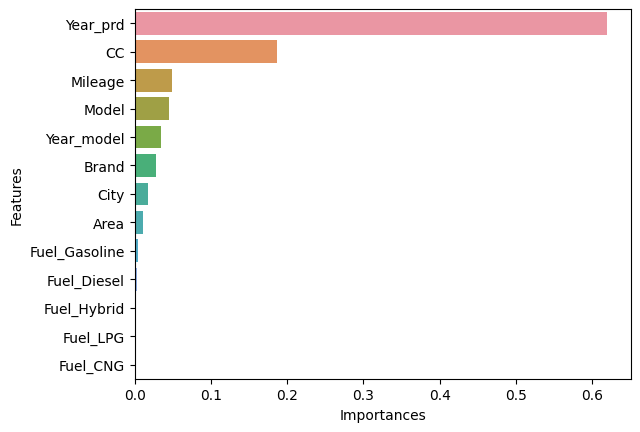

In [17]:
import seaborn as sns

sns.barplot(x='Importances',y='Features',data=df_feature_importances)

##### K-FOLD 교차 검증 학습 

In [18]:
import pandas as pd

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

In [19]:
from sklearn.model_selection import KFold

def exec_kfold(preprocess_X,preprocess_Y,folds=5):

    from sklearn.ensemble import RandomForestRegressor
    import numpy as np

    rfr = RandomForestRegressor(random_state=777)

    kfold = KFold(n_splits=folds)
    evals = dict({'Mae':[],'Mse':[],'Rmse':[],'R2':[]})
    mean_evals = dict({'Mae':[],'Mse':[],'Rmse':[],'R2':[]})
    
    # KFold 교차 검증 수행
    for iter_count , (train_index, test_index) in enumerate(kfold.split(preprocess_X)):

        print(str(iter_count+1) + "번째 fold")
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = preprocess_X.values[train_index], preprocess_X.values[test_index]
        y_train, y_test = preprocess_Y.values[train_index], preprocess_Y.values[test_index]
        
        # 회귀 모델 학습, 예측 
        rfr.fit(X_train, y_train) 
        y_pred = rfr.predict(X_test)

        # mae, mse, rmse, r2 
        mae , mse , rmse , r2 = regression_eval(y_test,y_pred)

        evals['Mae'].append(mae)
        evals['Mse'].append(mse)
        evals['Rmse'].append(rmse)
        evals['R2'].append(r2)

    mean_evals['CV'] = 'KFOLD = ' + str(folds) +'(mean)'
    for key in evals.keys():
        print("평균 ",key, " : ", np.mean(evals[key]))
        # mean_evals['Mean_'+key] = np.mean(evals[key])
        mean_evals[key] = np.mean(evals[key])

    return mean_evals

# exec_kfold 호출
mean_evals = exec_kfold(preprocess_X,preprocess_Y,folds=5) 

1번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_16672\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.343393655496766
mse :  100.5305728725529
rmse :  10.026493548222772
r2 :  0.9162255084014297
2번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_16672\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.098661558117073
mse :  90.26975372106796
rmse :  9.501039612645974
r2 :  0.9247484170741176
3번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_16672\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.192179251490719
mse :  91.42426142317173
rmse :  9.561603496441991
r2 :  0.9239497297236114
4번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_16672\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.095766648945998
mse :  88.75170624999183
rmse :  9.420812398619974
r2 :  0.9244480036078465
5번째 fold


C:\Users\user\AppData\Local\Temp\ipykernel_16672\590911768.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


mae :  6.1826165090144
mse :  90.86922669759679
rmse :  9.532535166344617
r2 :  0.9231707438541896
평균  Mae  :  6.182523524612991
평균  Mse  :  92.36910419287624
평균  Rmse  :  9.608496844455065
평균  R2  :  0.9225084805322389


##### No Cross Validation vs Cross Validation 평가 지표 비교

In [20]:
import pandas as pd

df_evals = pd.DataFrame(evals,index=[0])
df_evals

,CV,Mae,Mse,Rmse,R2
0,-,6.10683,87.971874,9.379332,0.927484


In [21]:
df_mean_evals= pd.DataFrame(mean_evals,index=[0])
df_mean_evals = df_mean_evals[['CV','Mae','Mse','Rmse','R2']]
df_mean_evals

,CV,Mae,Mse,Rmse,R2
0,KFOLD = 5(mean),6.182524,92.369104,9.608497,0.922508


##### GridSearchcv 하이퍼 파라미터 조정

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import time
import warnings


warnings.filterwarnings(action='ignore')

rfr = RandomForestRegressor(random_state=777)

preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

X_train, X_test , y_train , y_test = train_test_split(preprocess_X,preprocess_Y,test_size=0.2,random_state=777)

scorings = ['neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','r2']
param_grid = { 
        "n_estimators"      : [10,20,30],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }

start = time.time()

for scoring in scorings:

    grid_rfr = GridSearchCV(rfr, param_grid=param_grid , scoring=scoring, cv=5)
    grid_rfr.fit(X_train , y_train)

    print('GridSearchCV 최적 하이퍼 파라미터 :',grid_rfr.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rfr.best_score_))
    best_dclf = grid_rfr.best_estimator_

    # GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
    y_pred = best_dclf.predict(X_test)

    if scoring == 'neg_mean_absolute_error':
        mae = mean_absolute_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mae : ', mae)
    elif scoring == 'neg_mean_squared_error':
        mse = mean_squared_error(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor mse : ', mse)
    elif scoring == 'neg_root_mean_squared_error':
        rmse = np.sqrt(mean_squared_error(y_test , y_pred))
        print('테스트 세트에서의 RandomForestRegressor rmse : ', rmse)
    else:
        r2 = r2_score(y_test , y_pred)
        print('테스트 세트에서의 RandomForestRegressor r2 : ', r2)

print("GridSearchcv 소요시간 : ", time.time()-start)

GridSearchCV 최적 하이퍼 파라미터 : {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
GridSearchCV 최고 정확도: -6.2178
테스트 세트에서의 RandomForestRegressor mae :  6.068731807060273
GridSearchCV 최적 하이퍼 파라미터 : {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
GridSearchCV 최고 정확도: -92.5806
테스트 세트에서의 RandomForestRegressor mse :  86.19052557377059
GridSearchCV 최적 하이퍼 파라미터 : {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
GridSearchCV 최고 정확도: -9.6213
테스트 세트에서의 RandomForestRegressor rmse :  9.283885262850387
GridSearchCV 최적 하이퍼 파라미터 : {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
GridSearchCV 최고 정확도: 0.9220
테스트 세트에서의 RandomForestRegressor r2 :  0.9289520311894053
GridSearchcv 소요시간 :  1847.8474280834198
